---
title: "8.1"
format: 
  html:
    theme: lux
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:

import pandas as pd

# Load the Palmer Penguins dataset
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

# Print the first few rows
print(penguins.head())

# Identify categorical variables that need dummification
categorical_vars = ['species', 'island', 'sex']

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


We need to dummify categorical variables because most machine learning algorithms work with numerical data. Dummification converts categorical variables into a set of binary (0 or 1) variables representing each category.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

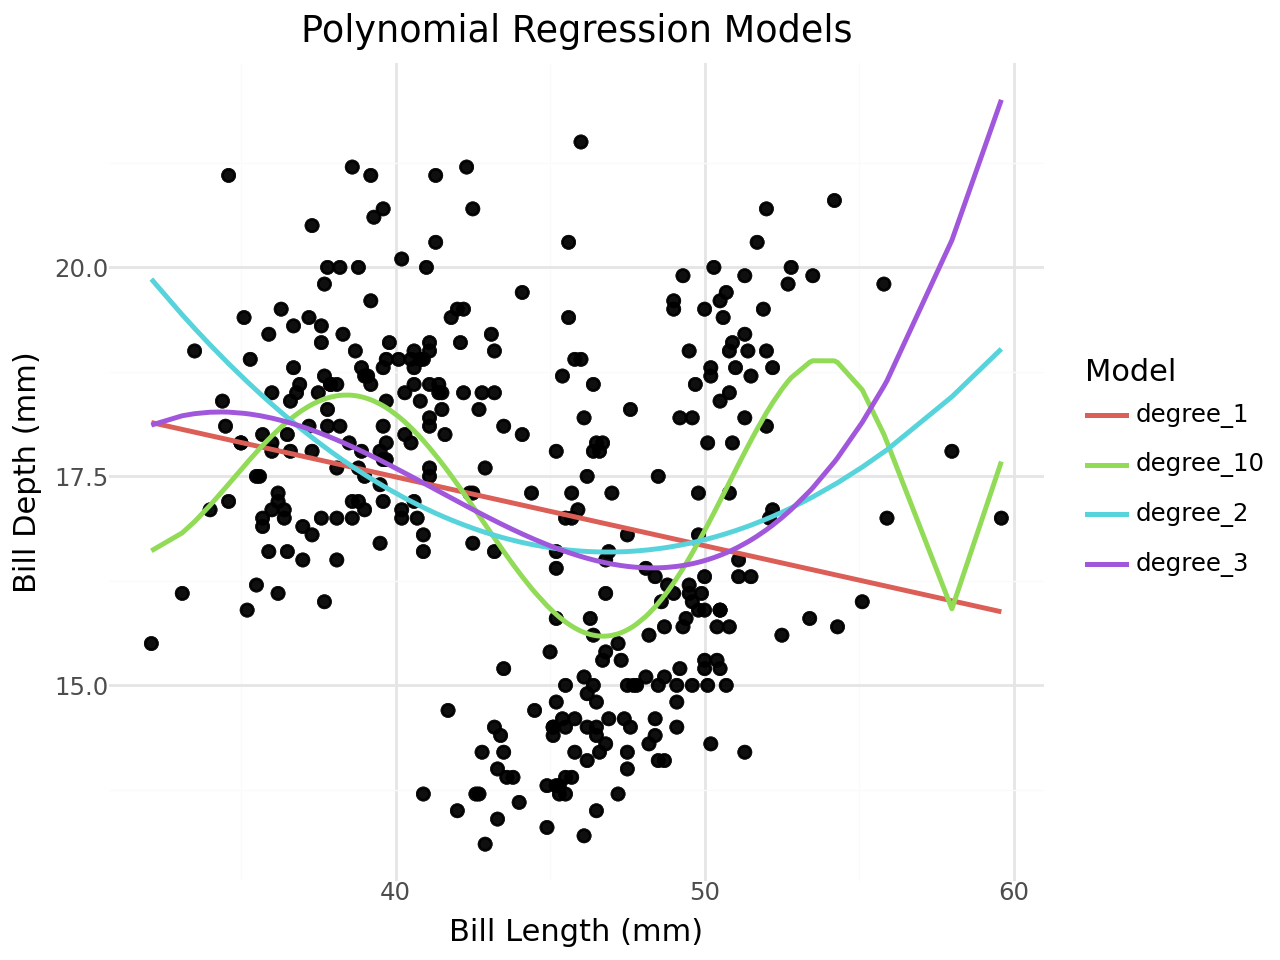

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal

# Load the Palmer Penguins dataset
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

# Drop rows with missing values
penguins = penguins.dropna()

# Prepare the data
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

# Fit the models and prepare predictions
models = []
degrees = [1, 2, 3, 10]
predictions = pd.DataFrame({'bill_length_mm': X.squeeze(), 'bill_depth_mm': y})

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    predictions[f'degree_{degree}'] = model.predict(X_poly)

# Reshape data for plotnine
predictions_long = predictions.melt(id_vars=['bill_length_mm', 'bill_depth_mm'],
                                    var_name='model',
                                    value_name='prediction')

# Plot using plotnine
plot = (
    ggplot(predictions_long, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='black', alpha=0.5, size=2) +
    geom_line(aes(y='prediction', color='model'), size=1) +
    labs(
        title="Polynomial Regression Models",
        x="Bill Length (mm)",
        y="Bill Depth (mm)",
        color="Model"
    ) +
    theme_minimal()
)

plot


* Are any of the models above underfitting the data? If so, which ones and how can you tell?

Degree 1 is underfitting the data because it doesn't take into account the variation in the relationship between bill_length_mm and bill_depth_mm. The simple straight-line model oversimplifies the pattern in the data.

* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?

Degree 10 is overfitting the data because it creates a highly complex curve that follows the noise in the dataset too closely. This can be seen in the extreme oscillations in the model's predictions that don't match the overall trend of the data.

* Which of the above models do you think fits the data best and why?

The cubic model (degree 3) fits the data best because it balances capturing the underlying trend without being overly complex. It accounts for variation in the relationship while avoiding the excessive complexity seen in the degree 10 model.